In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
import numpy as np

In [11]:
billboard_df = pd.read_csv('./final_data.csv')
artist_df = billboard_df[billboard_df['artist_name']=='Eminem']
print(len(artist_df))
artist_df.describe(include='all')

69


,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,artist_name,e_grammy,e_billboard,e_spotify
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69,69.000000,69.000000,69.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eminem,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN
mean,255.428260,0.450725,5.855072,-5.917319,0.594203,244.556304,121.600014,3.884058,NaN,0.043478,17.695652,50.927536
std,78.970256,1.136134,3.874029,4.038794,0.494643,75.867338,33.610623,0.738365,NaN,0.205425,38.563662,11.990583
min,29.805260,0.000000,0.000000,-24.945000,0.000000,29.805000,59.553000,1.000000,NaN,0.000000,0.000000,23.000000
25%,227.160360,0.000000,1.000000,-6.760000,0.000000,212.009000,90.992000,4.000000,NaN,0.000000,0.000000,45.000000
50%,267.258320,0.000000,7.000000,-4.941000,1.000000,254.862000,114.041000,4.000000,NaN,0.000000,0.000000,50.000000
75%,312.267300,0.276000,10.000000,-3.799000,1.000000,293.634000,156.982000,4.000000,NaN,0.000000,0.000000,55.000000


In [21]:
def drop_specific_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

def results(y, preds,type):
    print('R² score: \n',r2_score(y,preds))
    print('RSME: \n',math.sqrt(mean_squared_error(y,preds)))
    print('MAE: \n',mean_absolute_error(y,preds))
    plt.plot(y,preds, 'ro')
    x = np.linspace(min(min(y),min(preds)), max(max(y),max(preds)), 100)
    plt.plot(x,x)
    plt.xlabel('Valor real')
    plt.ylabel('Valor predit')
    plt.title('Èxit a billboard amb '+ type)
    plt.show()


In [13]:
artist_df = drop_specific_cols(artist_df, ['e_spotify', 'e_grammy'])

In [14]:
#variable to predict
y = artist_df.e_billboard

In [16]:
#features
#we do not consider 'key' based on boxplot observation (title and artist name are not physical variables)
billboard_features = ['duration', 'end_of_fade_in', 'loudness', 'mode','start_of_fade_out', 'tempo', 'time_signature']
X = artist_df[billboard_features]

In [17]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)

In [18]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
rf_billboard_preds = forest_model.predict(val_X)
print(rf_billboard_preds)

[24.02  1.91  8.92  1.43 13.74  9.11 11.12 11.73 36.91 19.95 19.88  1.5
  6.56 54.38 31.48 10.49 17.91  4.26]


R² score: 
 -0.012654101117237193
RSME: 
 39.32505986433248
MAE: 
 26.534444444444446


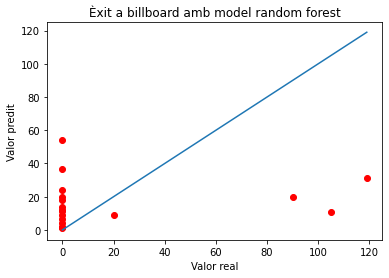

In [22]:
results(val_y, rf_billboard_preds,'model random forest')

In [23]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [24]:
svm_model = SVC(kernel='sigmoid', random_state=1)
svm_model.fit(train_X, train_y)
svm_billboard_preds = svm_model.predict(val_X)

R² score: 
 -0.2254603954793124
RSME: 
 43.26019468800902
MAE: 
 18.555555555555557


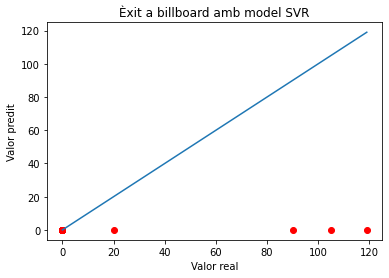

In [25]:
results(val_y, svm_billboard_preds,'model SVR')

In [26]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)
knn_billboard_preds = knn_model.predict(val_X)

R² score: 
 -0.2254603954793124
RSME: 
 43.26019468800902
MAE: 
 18.555555555555557


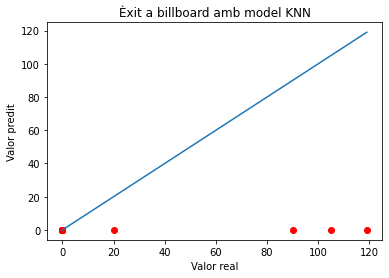

In [28]:
results(val_y, knn_billboard_preds,'model KNN')

In [29]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [30]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(train_X, train_y)
logistic_billboard_preds = logistic_model.predict(val_X)

R² score: 
 -0.2254603954793124
RSME: 
 43.26019468800902
MAE: 
 18.555555555555557


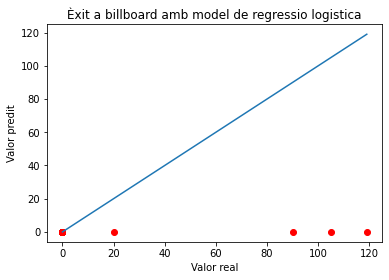

In [31]:
results(val_y, logistic_billboard_preds,'model de regressio logistica')